# Set the NOMAD Upload id
- Use the doi to find the nomad dataset
- go to the entry page
- copy the Uplaod id and paste it here

In [ ]:
upload_id = 'dyT-vLgKTkqK5JeSy_HWwA'

# VSM example dataset
## Introduction
VSM measurements  of the powder made from the as-homogenised $(\mathrm{Mn}_{53}\mathrm{Al}_{45}\mathrm{C}_2)_{99.4}\mathrm{Ni}_{0.6}$. The sample was hot-extruded at 600°C.
M(H) hysteresis and an M(T) heating and cooling ramp were measured on a sample of the extruded material.

This notebook demonstrates how to work with examplary VSM data. We're mainly going to work with the magmeas package.
## Data analysis

In [3]:
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)
from magmeas.magmeas import VSM
import requests

# dataDir = 'IFW_VSM_RawData/'

Let's start with an M(H) hysteresis loop. The magmeas package can automatically read the example dataset and calculates some extrinsic properties.

In [4]:
url = f"https://nomad-lab.eu/prod/v1/api/v1/uploads/{upload_id}/raw/IFW_VSM_RawData/VSM_MH.DAT"
response = requests.get(url)
with open('VSM_MH.DAT', "wb") as f:
  f.write(response.content)
url = f"https://nomad-lab.eu/prod/v1/api/v1/uploads/{upload_id}/raw/IFW_VSM_RawData/VSM_MT.DAT"
response = requests.get(url)
with open('VSM_MT.DAT', "wb") as f:
  f.write(response.content)

In [5]:
mh = VSM('VSM_MH.DAT')
print(mh.remanence.to('kA/m'))
print(mh.coercivity)

Remanence(value=394.46156395418495, unit=kA / m)
CoercivityHc(value=245763.17011336557, unit=A / m)


Since the extrinsic properties are stored as mammos_entity. Entity objects, we can also get information about their ontology.

In [6]:
mh.BHmax.ontology.get_annotations()

{'prefLabel': [locstr('MaximumEnergyProduct', 'en')],
 'elucidation': [locstr('The value of the maximum energy product (BH)max is deduced from a\nplot of BH(B) for all points of the second quadrant of the B-H\nhysteresis loop. BH varies with B going through a maximum value (BH)max\nfor a particular value of B.\n\n(BH)max equals the area of the largest second-quadrant rectangle which\nfits under the B-H loop.\n\nThe maximum energy product is considered to be the best single index\nof quality of a permanent magnet material.\nIt is twice the energy stored in the stray field of the magnet of\noptimal shape.', 'en')],
 'altLabel': [locstr('(BH)max', 'en')],
 'wikipediaReference': ['https://en.wikipedia.org/wiki/Maximum_energy_product']}

There is also some basic plotting functionality.

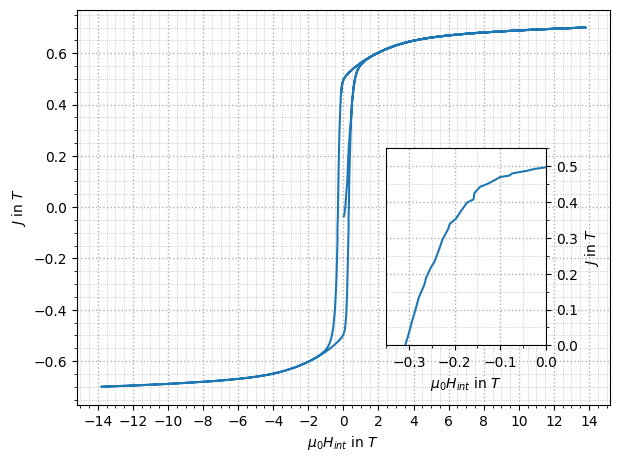

In [7]:
mh.plot()

The same applies to M(T) measurements.

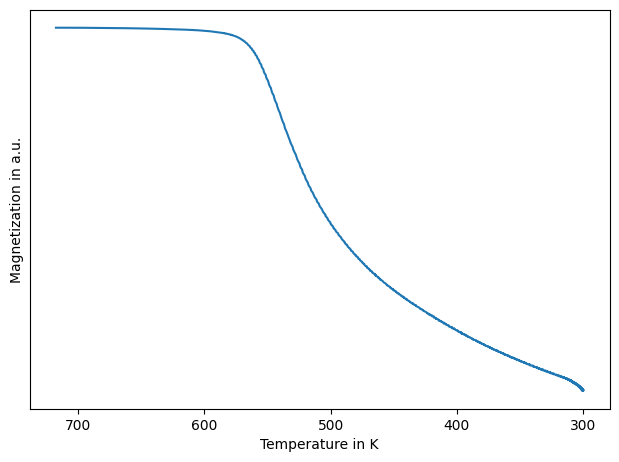

{'prefLabel': [locstr('CurieTemperature', 'en')],
 'elucidation': [locstr('Critical thermodynamic temperature of a ferromagnet.', 'en')],
 'comment': [locstr('Critical thermodynamic temperature of a ferromagnet.', 'en')],
 'wikidataReference': ['https://www.wikidata.org/wiki/Q191073'],
 'IEVReference': ['https://www.electropedia.org/iev/iev.nsf/display?openform&ievref=121-12-51'],
 'qudtReference': ['https://qudt.org/vocab/quantitykind/CurieTemperature'],
 'ISO80000Reference': ['12-35.1'],
 'label': [locstr('CurieTemperature', 'en')]}

In [8]:
mt = VSM('VSM_MT.DAT')

mt.plot()

mt.Tc.ontology.get_annotations()

In case the plotting functionality of magmeas is not sufficient we can also access the measurement values such as magnetic field H, magnetization M, time t and temperature T from the VSM object as they are saved as mammos_units.Quantity objects.

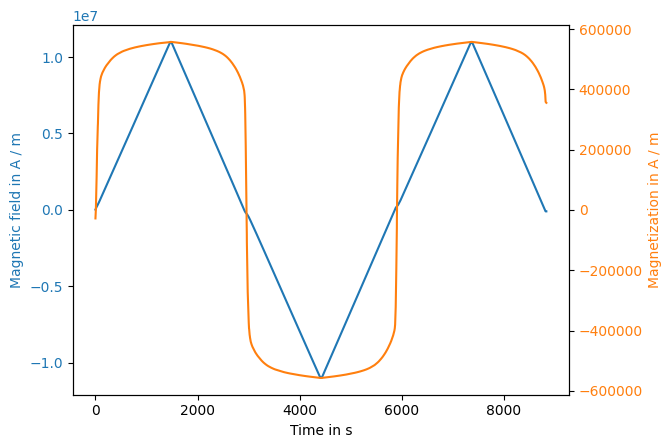

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
color1, color2 = 'tab:blue', 'tab:orange'

ax1.plot(mh.t, mh.H, color=color1)
ax1.set_xlabel(f'Time in {mh.t.unit}')
ax1.set_ylabel(f'Magnetic field in {mh.M.unit}', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2.plot(mh.t, mh.M, color=color2)
ax2.set_ylabel(f'Magnetization in {mh.M.unit}', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)